The following code will analyze Netflix cost and capabilities varying by country. The dataset is downloaded from Kaggle at kaggle datasets download -d prasertk/netflix-subscription-price-in-different-countries 

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

netflix_data = pd.read_csv("netflix price in different countries.csv")
print(netflix_data.head())

     Country  Total Library Size  No. of TV Shows  No. of Movies  \
0  Argentina                4760             3154           1606   
1    Austria                5640             3779           1861   
2    Bolivia                4991             3155           1836   
3   Bulgaria                6797             4819           1978   
4      Chile                4994             3156           1838   

   Cost Per Month - Basic ($)  Cost Per Month - Standard ($)  \
0                        3.74                           6.30   
1                        9.03                          14.67   
2                        7.99                          10.99   
3                        9.03                          11.29   
4                        7.07                           9.91   

   Cost Per Month - Premium ($)  
0                          9.26  
1                         20.32  
2                         13.99  
3                         13.54  
4                         12.74  


The following code will clean the data for usability. Includes: ensuring proper dtypes, more usable column names, clean formatting of names and numbers

In [7]:
#print(netflix_data.columns)
netflix_data = netflix_data.rename(columns={"Country":"country","Total Library Size":"total_library_size","No. of TV Shows":"tv_count","No. of Movies":"movie_count","Cost Per Month - Basic ($)":"cost_basic","Cost Per Month - Standard ($)":"cost_standard","Cost Per Month - Premium ($)":"cost_premium"})
#prints renamed columns
print(netflix_data.columns)
is_null = netflix_data.isna().value_counts()
#print(is_null)
#^ confirms no missing or null data
#print(netflix_data.dtypes)
#^confirms dtypes. Data looks good because all numerical values 

descriptive_stats = netflix_data.describe()
print(descriptive_stats)

Index(['country', 'total_library_size', 'tv_count', 'movie_count',
       'cost_basic', 'cost_standard', 'cost_premium'],
      dtype='object')
       total_library_size     tv_count  movie_count  cost_basic  \
count           65.000000    65.000000    65.000000   65.000000   
mean          5314.415385  3518.953846  1795.461538    8.368462   
std            980.322633   723.010556   327.279748    1.937819   
min           2274.000000  1675.000000   373.000000    1.970000   
25%           4948.000000  3154.000000  1628.000000    7.990000   
50%           5195.000000  3512.000000  1841.000000    8.990000   
75%           5952.000000  3832.000000  1980.000000    9.030000   
max           7325.000000  5234.000000  2387.000000   12.880000   

       cost_standard  cost_premium  
count      65.000000     65.000000  
mean       11.990000     15.612923  
std         2.863979      4.040672  
min         3.000000      4.020000  
25%        10.710000     13.540000  
50%        11.490000     14.45

In [8]:
#the following code should find any correlations between columns, hopefully illuminating whether greater prices are correlated with greater library sizes.
correlations = netflix_data.corr()
print(correlations)

                    total_library_size  tv_count  movie_count  cost_basic  \
total_library_size            1.000000  0.971146     0.849957   -0.062877   
tv_count                      0.971146  1.000000     0.699786   -0.003814   
movie_count                   0.849957  0.699786     1.000000   -0.179913   
cost_basic                   -0.062877 -0.003814    -0.179913    1.000000   
cost_standard                -0.055200  0.002285    -0.170391    0.898535   
cost_premium                 -0.071521 -0.011100    -0.189711    0.820914   

                    cost_standard  cost_premium  
total_library_size      -0.055200     -0.071521  
tv_count                 0.002285     -0.011100  
movie_count             -0.170391     -0.189711  
cost_basic               0.898535      0.820914  
cost_standard            1.000000      0.978768  
cost_premium             0.978768      1.000000  


     country  total_library_size  tv_count  movie_count  cost_basic  \
0  Argentina                4760      3154         1606        3.74   
1    Austria                5640      3779         1861        9.03   
2    Bolivia                4991      3155         1836        7.99   
3   Bulgaria                6797      4819         1978        9.03   
4      Chile                4994      3156         1838        7.07   

   cost_standard  cost_premium  diff_standard_basic  diff_premium_standard  
0           6.30          9.26                 2.56                   2.96  
1          14.67         20.32                 5.64                   5.65  
2          10.99         13.99                 3.00                   3.00  
3          11.29         13.54                 2.26                   2.25  
4           9.91         12.74                 2.84                   2.83  


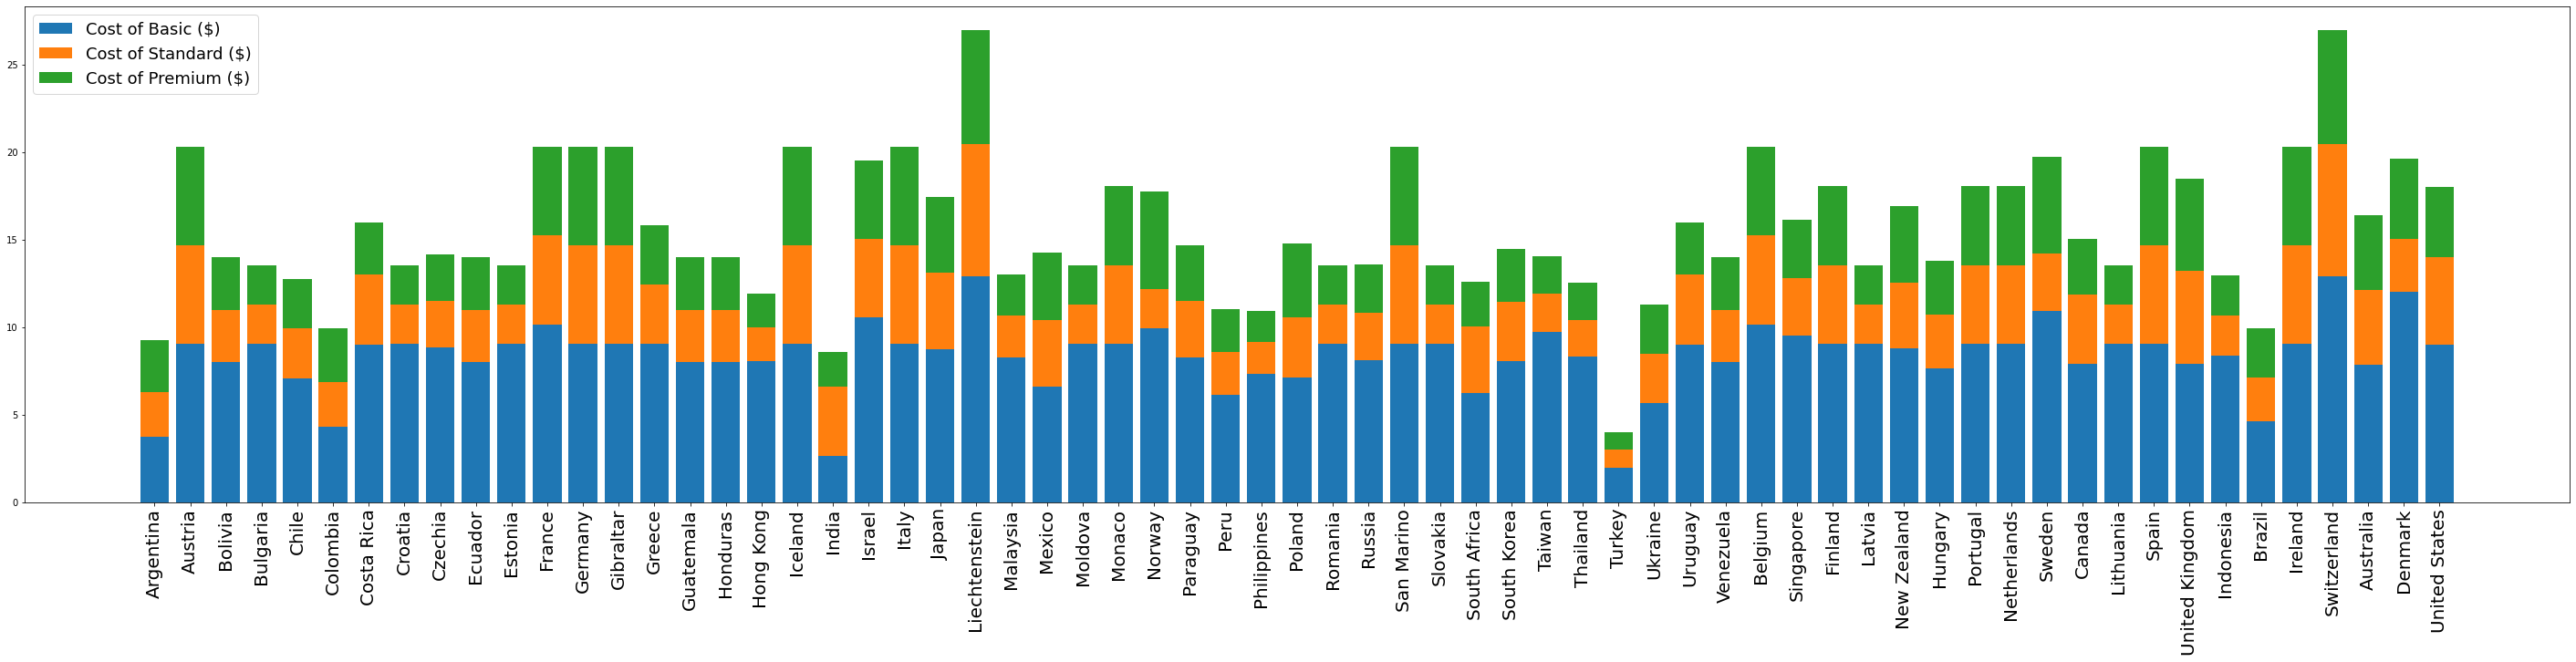

In [9]:
netflix_data["diff_standard_basic"] = netflix_data["cost_standard"] - netflix_data["cost_basic"]
netflix_data["diff_premium_standard"] = netflix_data["cost_premium"] - netflix_data["cost_standard"]

print(netflix_data.head())
plt.figure(figsize=(50,10))
plt.bar(x=netflix_data.country,height=netflix_data.cost_basic)
plt.xticks(rotation=90, fontsize= 20)
plt.bar(x=netflix_data.country,height=netflix_data.diff_standard_basic,bottom = netflix_data.cost_basic)
plt.bar(x=netflix_data.country,height=netflix_data.diff_premium_standard,bottom =netflix_data.cost_standard)
plt.legend(["Cost of Basic ($)","Cost of Standard ($)","Cost of Premium ($)"], fontsize= 18)
plt.show()
plt.close()

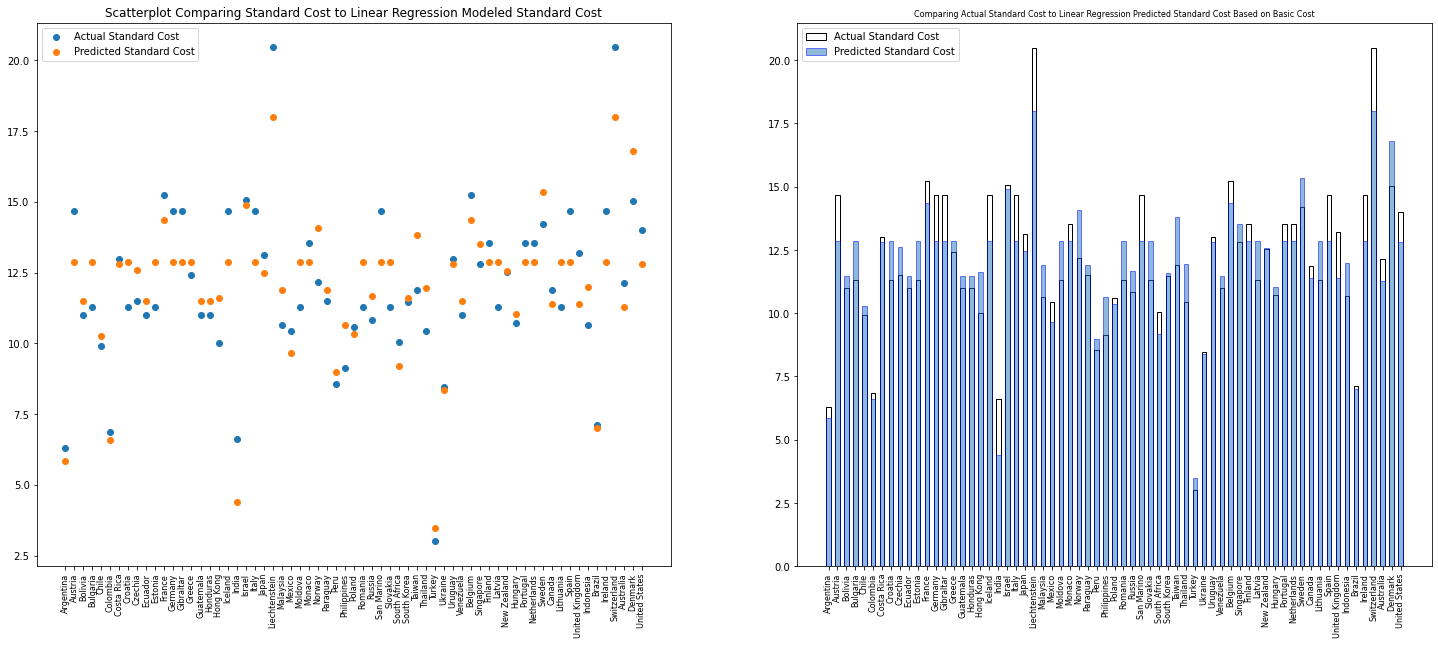

<Figure size 432x288 with 0 Axes>

In [60]:
#the following code will do a basic linear regression between basic price and standard price as they are heavily correlated
from sklearn.linear_model import LinearRegression

X = np.array(netflix_data['cost_basic']).reshape(-1, 1)
y = np.array(netflix_data['cost_standard']).reshape(-1, 1)
reg = LinearRegression()
basic_standard_reg = reg.fit(X,y)

#the following will predict what the standard cost should be based on the actual basic cost so that we can validate the accuracy of the model
predictedX =basic_standard_reg.predict(X)
netflix_data["predicted_cost_standard"] = predictedX
fig = plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.scatter(x=netflix_data["country"],y=netflix_data["cost_standard"])
plt.scatter(x=netflix_data["country"],y=netflix_data["predicted_cost_standard"])
plt.title("Scatterplot Comparing Standard Cost to Linear Regression Modeled Standard Cost")
plt.xticks(rotation=90, fontsize = 8)
plt.legend(["Actual Standard Cost","Predicted Standard Cost"])

plt.subplot(1,2,2)
plt.bar(x=netflix_data["country"],height=netflix_data["cost_standard"],color="none",edgecolor="black", width = 0.5)
plt.bar(x=netflix_data["country"],height=netflix_data["predicted_cost_standard"],alpha=0.5,edgecolor="blue",width = 0.5)
plt.xticks(rotation=90, fontsize = 8)
plt.legend(["Actual Standard Cost","Predicted Standard Cost"])
plt.title("Comparing Actual Standard Cost to Linear Regression Predicted Standard Cost Based on Basic Cost", fontsize= 8)
plt.show()


While this visualization is only mildly helpful in showing us the accuracy of the regression model, the model can be important if future determinations of standard cost need to be predicted when only basic cost is available if new data is provided